In [ ]:
!pip install -Uqq fastbook
!pip install voila
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *
!jupyter serveretension enable --sys-prefix voila

     |████████████████████████████████| 727kB 9.3MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 204kB 14.0MB/s 
     |████████████████████████████████| 1.2MB 17.1MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
     |████████████████████████████████| 1.6MB 7.5MB/s 
     |████████████████████████████████| 122kB 32.3MB/s 
     |████████████████████████████████| 389kB 25.0MB/s 
     |████████████████████████████████| 552kB 36.4MB/s 
     |████████████████████████████████| 81kB 12.9MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
ERROR: nbdev 1.1.14 has requirement nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
ERROR: jupyter-server 1.7.0 has requirement tornado>=6.1.0, but you'll have tornado 5.1.1 which is incompatible.
  Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalle

Mounted at /content/gdrive
Traceback (most recent call last):
  File "/usr/local/bin/jupyter", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/command.py", line 230, in main
    command = _jupyter_abspath(subcommand)
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/command.py", line 133, in _jupyter_abspath
    'Jupyter command `{}` not found.'.format(jupyter_subcommand)
Exception: Jupyter command `jupyter-serveretension` not found.


In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', '36d38fa2aa544e3fa5f4ac7337cde590')
results = search_images_bing(key, 'labradoodle')
ims = results.attrgot('content_url')
len(ims)

150

In [ ]:
import os
os.mkdir('images')

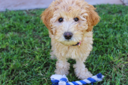

In [ ]:
ims = ['https://honden-wereld.nl/wp-content/uploads/2019/05/labradoodle-pup.jpg']
dest = 'images/labra.jpg'
download_url(ims[0], dest)
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
doodle_types = 'labra', 'golden', 'aussie'
path = Path('doodles')
if not path.exists():
  path.mkdir()
  for o in doodle_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{o}doodle')
    download_images(dest, urls=results.attrgot('contentUrl'))

In [ ]:
fns = get_image_files(path)
fns

(#417) [Path('doodles/labra/00000140.JPG'),Path('doodles/labra/00000012.jpg'),Path('doodles/labra/00000021.jpg'),Path('doodles/labra/00000062.jpg'),Path('doodles/labra/00000121.jpeg'),Path('doodles/labra/00000006.jpeg'),Path('doodles/labra/00000003.jpg'),Path('doodles/labra/00000020.jpg'),Path('doodles/labra/00000147.jpg'),Path('doodles/labra/00000064.JPG')...]

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
failed.map(Path.unlink);

In [ ]:
doodles = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

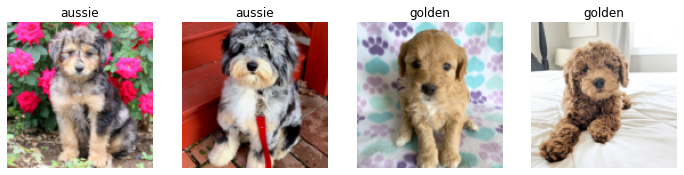

In [ ]:
dls = doodles.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

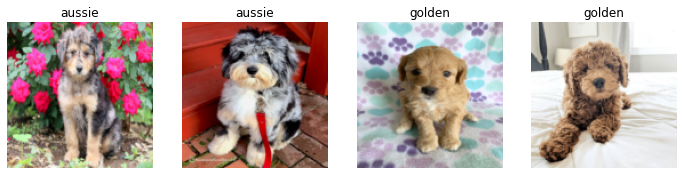

In [ ]:
doodles = doodles.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = doodles.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

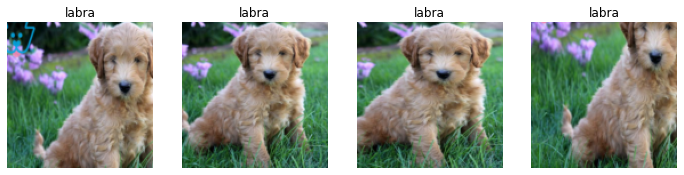

In [ ]:
doodles = doodles.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = doodles.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

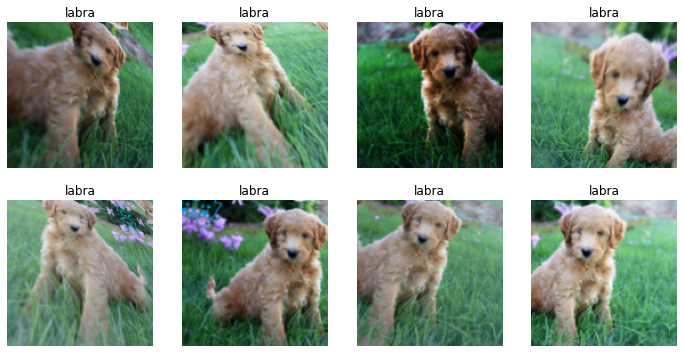

In [ ]:
doodles = doodles.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = doodles.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
doodles = doodles.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = doodles.dataloaders(path)
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.785135,1.055410,0.518072,00:13


epoch,train_loss,valid_loss,error_rate,time
0,1.007044,0.836087,0.373494,00:13
1,0.940854,0.820950,0.349398,00:13
2,0.820355,0.867559,0.313253,00:13
3,0.757244,0.847556,0.289157,00:13


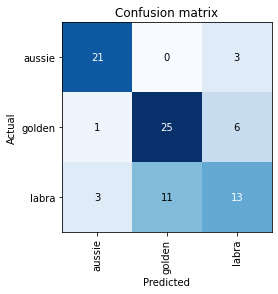

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

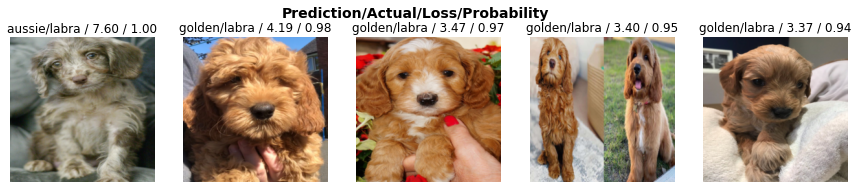

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.predict('images/labra.jpg')
learn_inf.dls.vocab

['aussie', 'golden', 'labra']

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

IndexError: ignored

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

In [ ]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128,128))
  pred,pred_idx,probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Select your doodle!'), btn_upload, btn_run, out_pl, lbl_pred])